In [77]:
import os, sys
print("Current folder:", os.getcwd())
sys.path.insert(0, os.path.abspath(".."))
print("Project root added:", os.path.abspath(".."))

Current folder: /home/jovyan/EEP-153---Project-1/notebooks
Project root added: /home/jovyan/EEP-153---Project-1


In [78]:
from src.indicators import INDICATORS
from src.wb_fetch import fetch_wb_data
from src.panel import build_panel

In [79]:
import wbdata
import pandas as pd

countries_list = wbdata.get_countries()          # this is a LIST in your wbdata
countries_df = pd.DataFrame(countries_list)      # convert to DataFrame

countries_df.columns


Index(['id', 'iso2Code', 'name', 'region', 'adminregion', 'incomeLevel',
       'lendingType', 'capitalCity', 'longitude', 'latitude'],
      dtype='object')

In [80]:
panel = build_panel(df)
panel[["country", "year",
    "ag_export_share", "food_prod_index",
    "adult_mortality_male", "adult_mortality_female",
    "export_dependent"]].head()


,country,year,ag_export_share,food_prod_index,adult_mortality_male,adult_mortality_female,export_dependent
0,Africa Eastern and Southern,2022,1.901368,NaN,296.227071,206.251098,False
1,Africa Eastern and Southern,2021,1.927539,NaN,327.093724,235.202177,False
2,Africa Eastern and Southern,2020,1.981092,100.0,303.991744,215.828971,False
3,Africa Eastern and Southern,2019,2.014785,100.0,301.917613,217.181340,False
4,Africa Eastern and Southern,2018,2.146118,100.0,309.267566,224.683057,False


In [81]:
def region_value(x):
    if isinstance(x, dict):
        return x.get("value")
    return x
countries_df["region_value"] = countries_df["region"].apply(region_value)
countries_only = countries_df[countries_df["region_value"] != "Aggregates"].copy()
country_codes = countries_only["id"].tolist()
len(country_codes), countries_only[["id", "name", "region_value"]].head()

(217,
     id         name                                       region_value
 0  ABW        Aruba                         Latin America & Caribbean 
 2  AFG  Afghanistan  Middle East, North Africa, Afghanistan & Pakistan
 5  AGO       Angola                                Sub-Saharan Africa 
 6  ALB      Albania                              Europe & Central Asia
 7  AND      Andorra                              Europe & Central Asia)

In [82]:
df = fetch_wb_data(
    INDICATORS,
    start_year=2000,
    end_year=2022,
    cache_path="../data/wb_cache_all.csv"
)

panel = build_panel(df_countries)

panel["country"].nunique(), panel.head()


(217,
   country  ag_export_share  food_prod_index  adult_mortality_male  \
 0   Aruba         0.228271              NaN               118.505   
 1   Aruba         0.102736              NaN               159.045   
 2   Aruba         0.069199              NaN               134.254   
 3   Aruba         0.104098              NaN               126.903   
 4   Aruba         0.076267              NaN               130.119   
 
    adult_mortality_female  year  export_dependent  
 0                  60.053  2022             False  
 1                  85.706  2021             False  
 2                  62.616  2020             False  
 3                  59.787  2019             False  
 4                  60.625  2018             False  )

In [83]:
df["country"].head(20)

0     Africa Eastern and Southern
1     Africa Eastern and Southern
2     Africa Eastern and Southern
3     Africa Eastern and Southern
4     Africa Eastern and Southern
5     Africa Eastern and Southern
6     Africa Eastern and Southern
7     Africa Eastern and Southern
8     Africa Eastern and Southern
9     Africa Eastern and Southern
10    Africa Eastern and Southern
11    Africa Eastern and Southern
12    Africa Eastern and Southern
13    Africa Eastern and Southern
14    Africa Eastern and Southern
15    Africa Eastern and Southern
16    Africa Eastern and Southern
17    Africa Eastern and Southern
18    Africa Eastern and Southern
19    Africa Eastern and Southern
Name: country, dtype: object

In [84]:
panel[["ag_export_share","food_prod_index","adult_mortality_male","adult_mortality_female"]].isna().mean().sort_values()

adult_mortality_female    0.003005
adult_mortality_male      0.003005
food_prod_index           0.108595
ag_export_share           0.228010
dtype: float64

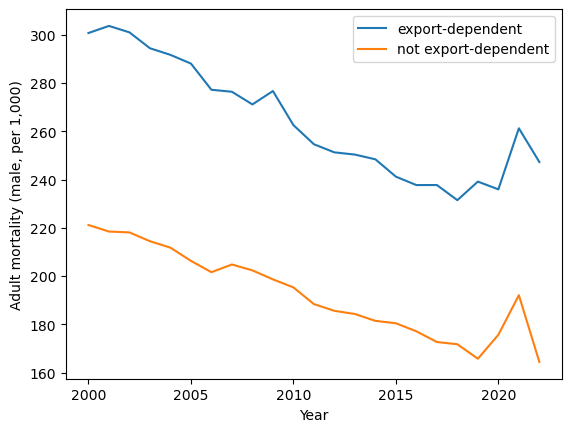

In [85]:
import matplotlib.pyplot as plt

tmp = panel.dropna(subset=["adult_mortality_male", "ag_export_share"]).copy()
tmp["group"] = tmp["export_dependent"].map({True: "export-dependent", False: "not export-dependent"})

trend = tmp.groupby(["year", "group"])["adult_mortality_male"].mean().reset_index()

for g in trend["group"].unique():
    sub = trend[trend["group"] == g]
    plt.plot(sub["year"], sub["adult_mortality_male"], label=g)

plt.xlabel("Year")
plt.ylabel("Adult mortality (male, per 1,000)")
plt.legend()
plt.show()

In [86]:
df_countries = fetch_wb_data(
    INDICATORS,
    start_year=2000,
    end_year=2022,
    countries=country_codes,   # <-- your filtered list (217 ISO3 codes)
    cache_path="../data/wb_cache_countries.csv")
df_countries.shape, df_countries["country"].nunique(), df_countries["country"].head(10)

((4991, 6),
 217,
 0    Aruba
 1    Aruba
 2    Aruba
 3    Aruba
 4    Aruba
 5    Aruba
 6    Aruba
 7    Aruba
 8    Aruba
 9    Aruba
 Name: country, dtype: object)

In [87]:
panel = build_panel(df_countries)
panel.shape, panel["country"].nunique()

((4991, 7), 217)

In [88]:
panel["country"].str.contains("Africa|World|income|states|dividend", case=False).mean()

np.float64(0.013824884792626729)